# Broad H$\alpha$ Luminosity vs. X-ray Luminosity

This notebook looks at the correlation between the broad H$\alpha$ and intrinsic ultra-hard X-ray (14-150 keV) luminosity for Sy 1s and how Sy 1.9s are placed with respect to this correlation.

In [1]:
# Standard module imports
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
# Setup figures and upload plotting modules
style='notebook'
execfile('/Users/ttshimiz/Dropbox/Research/figure_setup.py')

In [3]:
# Upload the sample data
df = pd.read_csv('../data/cleaned_sample.csv', index_col=0)

We want to look at whether there is an *intrinsic* correlation between the X-ray luminosity and the broad Halpha luminosity. If there is then it should be evident in Sy 1s where there essentially is no obscuration to the BLR. For now we'll use Sy 1s and Sy 1.2s as our unobscured population to measure the correlation.

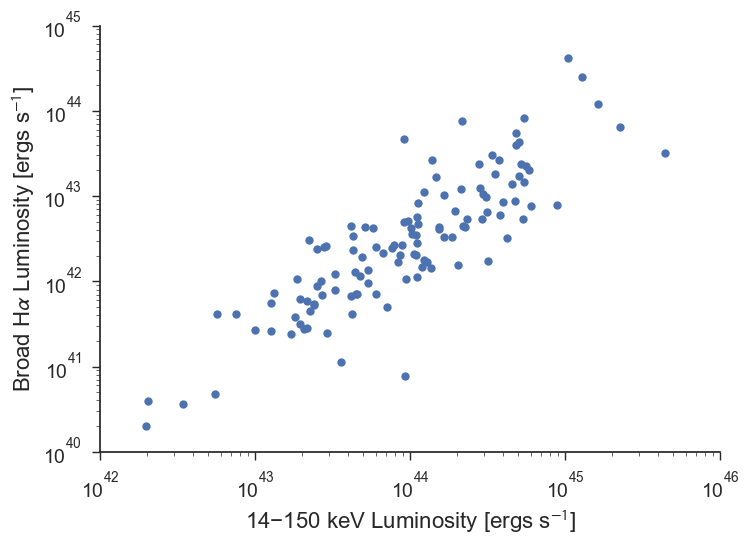

In [4]:
ind_unobscured = (df['Type'] == 1) | (df['Type'] == 1.2)

# Setup the figure
fig = plt.figure()
ax = fig.add_subplot(111)

ax.loglog(df['Intrinsic X-ray Luminosity'][ind_unobscured], df['Broad Halpha Luminosity'][ind_unobscured],
          color='b', marker='o', ms=6, ls='None')
ax.set_xlabel(r'14-150 keV Luminosity [ergs s$^{-1}$]')
ax.set_ylabel(r'Broad H$\alpha$ Luminosity [ergs s$^{-1}$]')
sn.despine()

Clearly there is a fairly strong correlation between the two as expected. I need to get errors on these however to make the plot better. But let's put the Sy 1.8 and Sy 1.9 sources on the plot to see where they lie with respect to the unobscured population.

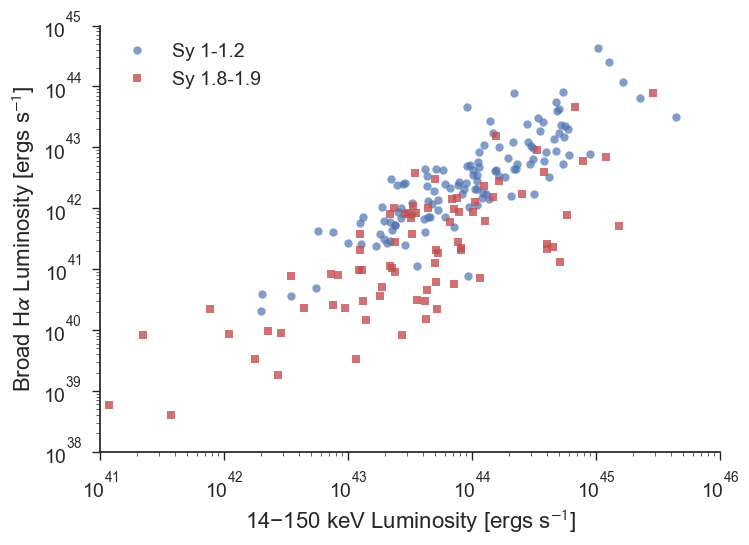

In [5]:
ind_obscured = (df['Type'] == 1.8) | (df['Type'] == 1.9)

# Setup the figure
fig = plt.figure()
ax = fig.add_subplot(111)

ax.loglog(df['Intrinsic X-ray Luminosity'][ind_unobscured], df['Broad Halpha Luminosity'][ind_unobscured],
          color='b', marker='o', ms=6, ls='None', label='Sy 1-1.2', alpha=0.7)
ax.loglog(df['Intrinsic X-ray Luminosity'][ind_obscured], df['Broad Halpha Luminosity'][ind_obscured],
          color='r', marker='s', ms=6, ls='None', label='Sy 1.8-1.9', alpha=0.8)
ax.set_xlabel(r'14-150 keV Luminosity [ergs s$^{-1}$]')
ax.set_ylabel(r'Broad H$\alpha$ Luminosity [ergs s$^{-1}$]')
ax.legend(loc='upper left')
sn.despine()

Let's measure the relationship between X-ray and broad H$\alpha$ for the unobscured population. For now we'll just use a standard linear least squares.

In [6]:
from scipy import stats

In [7]:
x = np.log10(df['Intrinsic X-ray Luminosity'][ind_unobscured])
y = np.log10(df['Broad Halpha Luminosity'][ind_unobscured])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print 'Slope =', slope
print 'Intercept =', intercept
print 'Corr. Coefficient =', r_value
print 'P-value =', p_value
print 'Standard Error =', std_err

Slope = 1.08530371536
Intercept = -5.27057849569
Corr. Coefficient = 0.852988826468
P-value = 2.12204325407e-35
Standard Error = 0.0608759903125


In [8]:
# Calculate the scatter
y_predict = x*slope + intercept
scatter = np.std(y - y_predict)
print 'Scatter =', scatter

Scatter = 0.411464318197


Let's plot the measured relationship on our figure.

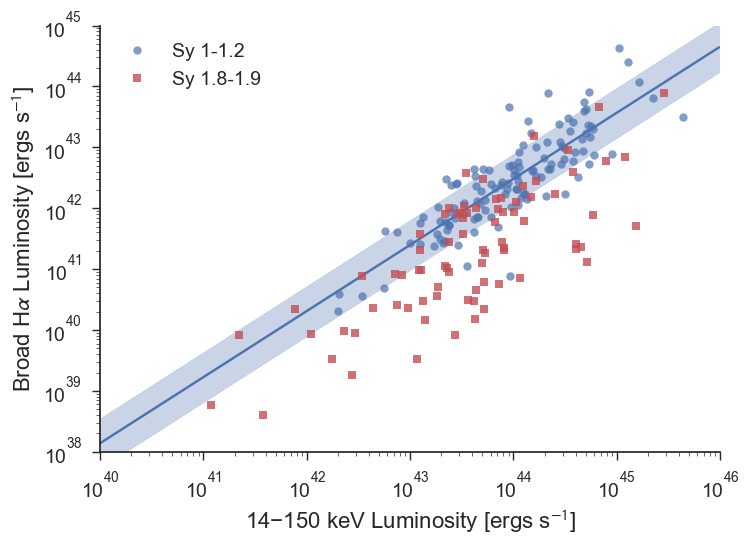

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

dummy_lx = np.arange(40, 46, 0.01)
dummy_halpha = slope*dummy_lx + intercept

ax.loglog(df['Intrinsic X-ray Luminosity'][ind_unobscured], df['Broad Halpha Luminosity'][ind_unobscured],
          color='b', marker='o', ms=6, ls='None', label='Sy 1-1.2', alpha=0.7)
ax.plot(10**dummy_lx, 10**dummy_halpha, 'b-')
ax.fill_between(10**dummy_lx, 10**(dummy_halpha-scatter), 10**(dummy_halpha+scatter), color='b', alpha=0.3)
ax.loglog(df['Intrinsic X-ray Luminosity'][ind_obscured], df['Broad Halpha Luminosity'][ind_obscured],
          color='r', marker='s', ms=6, ls='None', label='Sy 1.8-1.9', alpha=0.8)
ax.set_ylim(1e+38, 1e+45)
ax.set_xlabel(r'14-150 keV Luminosity [ergs s$^{-1}$]')
ax.set_ylabel(r'Broad H$\alpha$ Luminosity [ergs s$^{-1}$]')
ax.legend(loc='upper left')
sn.despine()
#fig.savefig('../figures/halpha_vs_xray.pdf', bbox_inches='tight')

Nice it looks like the measure relationship is pretty good and the scatter is encompassing a decent proportion of the unobscured points. Let's now identify the Sy 1.9 sources that are at least 2-sigma below the relationship.

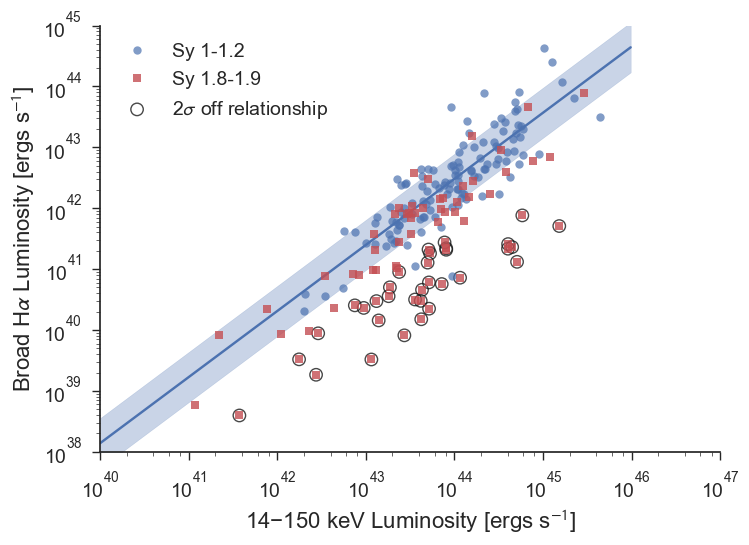

In [10]:
halpha_predict_sy1_9 = np.log10(df['Intrinsic X-ray Luminosity'][ind_obscured])*slope + intercept
diff_halpha = halpha_predict_sy1_9 - np.log10(df['Broad Halpha Luminosity'][ind_obscured])
off_srcs = diff_halpha > 2*scatter

fig = plt.figure()
ax = fig.add_subplot(111)

dummy_lx = np.arange(40, 46, 0.01)
dummy_halpha = slope*dummy_lx + intercept

ax.loglog(df['Intrinsic X-ray Luminosity'][ind_unobscured], df['Broad Halpha Luminosity'][ind_unobscured],
          color='b', marker='o', ms=6, ls='None', label='Sy 1-1.2', alpha=0.7)
ax.plot(10**dummy_lx, 10**dummy_halpha, 'b-')
ax.fill_between(10**dummy_lx, 10**(dummy_halpha-scatter), 10**(dummy_halpha+scatter), color='b', alpha=0.3)
ax.loglog(df['Intrinsic X-ray Luminosity'][ind_obscured], df['Broad Halpha Luminosity'][ind_obscured],
          color='r', marker='s', ms=6, ls='None', label='Sy 1.8-1.9', alpha=0.8)
ax.scatter(df['Intrinsic X-ray Luminosity'][ind_obscured][off_srcs], df['Broad Halpha Luminosity'][ind_obscured][off_srcs],
           edgecolor='k', marker='o', s=80, facecolor='None', lw=1.0, alpha=0.8, label=r'2$\sigma$ off relationship')
ax.set_ylim(1e+38, 1e+45)
ax.set_xlabel(r'14-150 keV Luminosity [ergs s$^{-1}$]')
ax.set_ylabel(r'Broad H$\alpha$ Luminosity [ergs s$^{-1}$]')
ax.legend(loc='upper left')
sn.despine()
#fig.savefig('../figures/halpha_vs_xray_2sigcircled.pdf', bbox_inches='tight')

In [11]:
print 'Number of Sy 1.9 sources: ', sum(ind_obscured)
print r'Number of Sy 1.9 sources 2sigma below Sy 1 Halpha-X-ray relationship: ', sum(off_srcs)

Number of Sy 1.9 sources:  79
Number of Sy 1.9 sources 2sigma below Sy 1 Halpha-X-ray relationship:  33


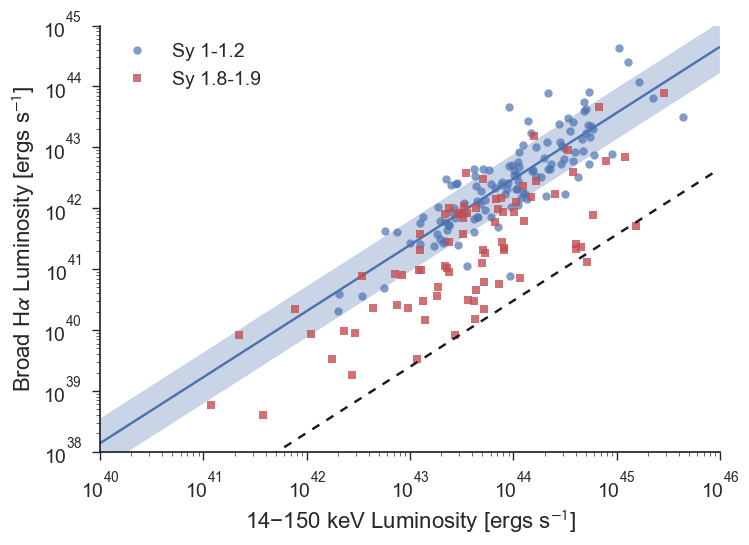

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

dummy_lx = np.arange(40, 46, 0.01)
dummy_halpha = slope*dummy_lx + intercept

ax.loglog(df['Intrinsic X-ray Luminosity'][ind_unobscured], df['Broad Halpha Luminosity'][ind_unobscured],
          color='b', marker='o', ms=6, ls='None', label='Sy 1-1.2', alpha=0.7)
ax.plot(10**dummy_lx, 10**dummy_halpha, 'b-')
ax.fill_between(10**dummy_lx, 10**(dummy_halpha-scatter), 10**(dummy_halpha+scatter), color='b', alpha=0.3)
ax.loglog(df['Intrinsic X-ray Luminosity'][ind_obscured], df['Broad Halpha Luminosity'][ind_obscured],
          color='r', marker='s', ms=6, ls='None', label='Sy 1.8-1.9', alpha=0.8)
ax.plot(10**dummy_lx, 10**(dummy_halpha-2.0), 'k--')
ax.set_ylim(1e+38, 1e+45)
ax.set_xlabel(r'14-150 keV Luminosity [ergs s$^{-1}$]')
ax.set_ylabel(r'Broad H$\alpha$ Luminosity [ergs s$^{-1}$]')
ax.legend(loc='upper left')
sn.despine()
#fig.savefig('../figures/halpha_vs_xray_with2dexLine.pdf', bbox_inches='tight')

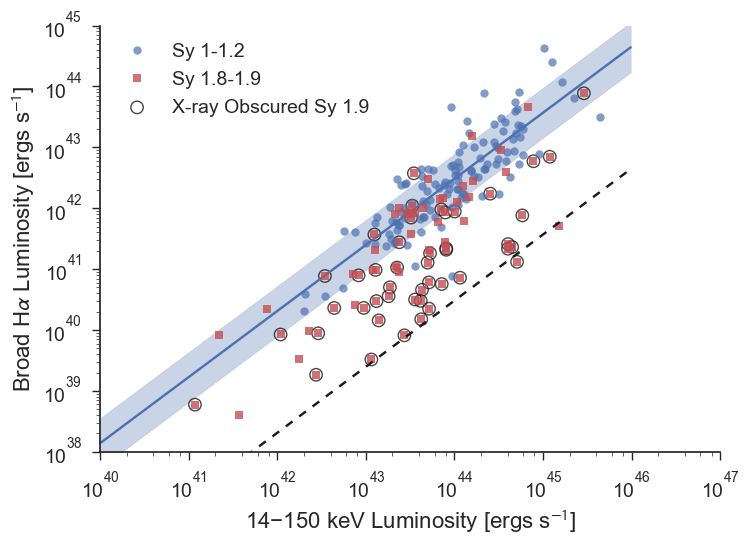

In [13]:
xray_obscured = df['NH'][ind_obscured] > 22.

fig = plt.figure()
ax = fig.add_subplot(111)

dummy_lx = np.arange(40, 46, 0.01)
dummy_halpha = slope*dummy_lx + intercept

ax.loglog(df['Intrinsic X-ray Luminosity'][ind_unobscured], df['Broad Halpha Luminosity'][ind_unobscured],
          color='b', marker='o', ms=6, ls='None', label='Sy 1-1.2', alpha=0.7)
ax.plot(10**dummy_lx, 10**dummy_halpha, 'b-')
ax.fill_between(10**dummy_lx, 10**(dummy_halpha-scatter), 10**(dummy_halpha+scatter), color='b', alpha=0.3)
ax.loglog(df['Intrinsic X-ray Luminosity'][ind_obscured], df['Broad Halpha Luminosity'][ind_obscured],
          color='r', marker='s', ms=6, ls='None', label='Sy 1.8-1.9', alpha=0.8)
ax.plot(10**dummy_lx, 10**(dummy_halpha-2.0), 'k--')
ax.scatter(df['Intrinsic X-ray Luminosity'][ind_obscured][xray_obscured],
           df['Broad Halpha Luminosity'][ind_obscured][xray_obscured],
           edgecolor='k', marker='o', s=80, facecolor='None', lw=1.0, alpha=0.8, label=r'X-ray Obscured Sy 1.9')
ax.set_ylim(1e+38, 1e+45)
ax.set_xlabel(r'14-150 keV Luminosity [ergs s$^{-1}$]')
ax.set_ylabel(r'Broad H$\alpha$ Luminosity [ergs s$^{-1}$]')
ax.legend(loc='upper left')
sn.despine()
#fig.savefig('../figures/halpha_vs_xray_with2dexLine.pdf', bbox_inches='tight')